In [1]:
# Importing the libraries
import glob
import pandas as pd

In [33]:
# Read all the csv files in the folder
data_list = glob.glob('Airbnb Prices in Europe/*.csv')

# Now we can use pandas to read all the csv files and combine them into one
df = pd.concat(map(pd.read_csv, data_list))

# Drop the index column
df.drop(['Unnamed: 0', 'attr_index', 'rest_index', 'rest_index_norm', 'attr_index_norm'], axis=1, inplace=True)

In [34]:
# Check the shape of the dataframe
df.shape
# Check the first 5 rows of the dataframe
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508


/var/folders/71/krwvwqnd59748c6sr2hd_3mh0000gn/T/ipykernel_4477/948315173.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


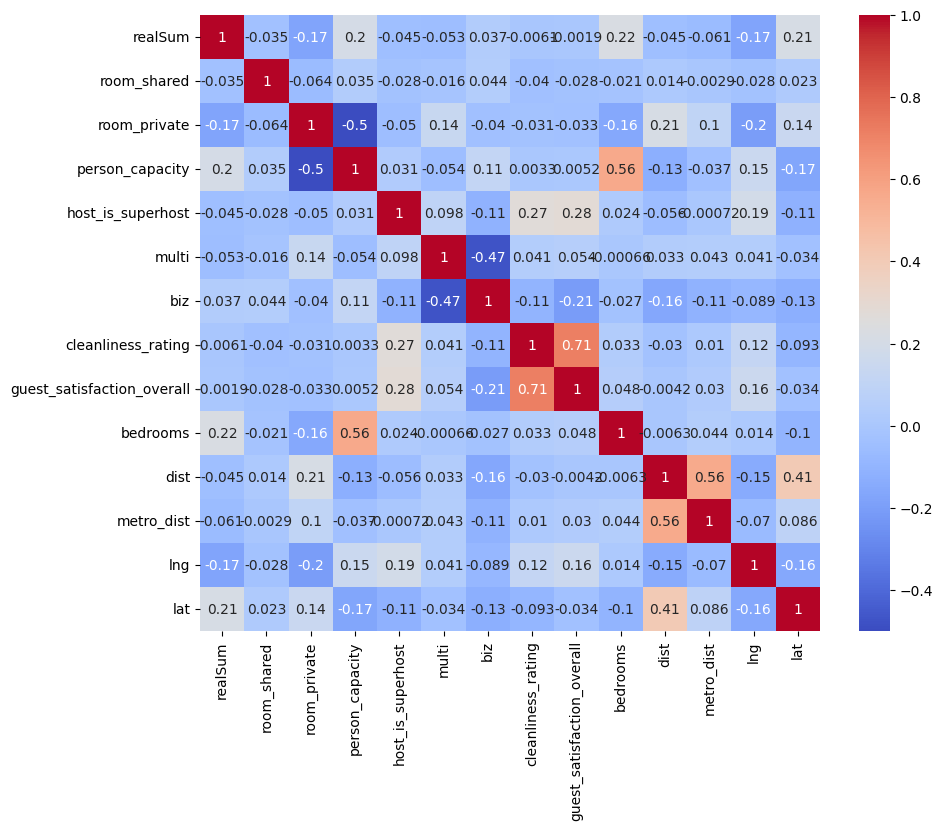

In [35]:
# Check multi-collinearity of the features
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [36]:
# Dropping the features that are highly correlated
df.drop(['cleanliness_rating'], axis=1, inplace=True)

In [47]:
# Corss-featuring longitude and latitude
df['lng-lat'] = df['lng'] * df['lat']

# Drop the longitude and latitude columns
df.drop(['lng', 'lat'], axis=1, inplace=True)